In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Imputer
import numpy as np

In [6]:
hr_data = pd.read_csv("hr_attrition.csv")
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
hr_data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

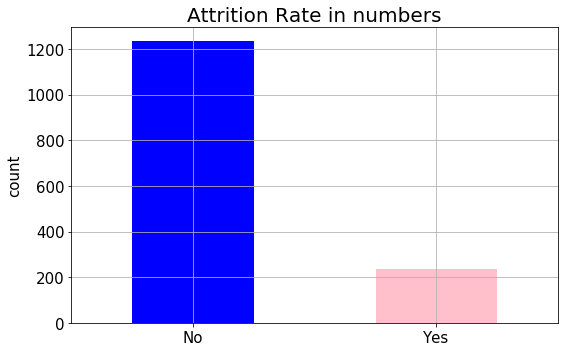

In [35]:
hr_data.Attrition.value_counts().plot(kind='bar',figsize=(8,5),color=["blue","pink"],fontsize=10)
plt.title("Attrition Rate in numbers",fontsize=20)
plt.xticks(rotation=0,fontsize='15')
plt.yticks(fontsize='15')
plt.ylabel('count',fontsize=15)

plt.tight_layout()
plt.grid()
plt.show()

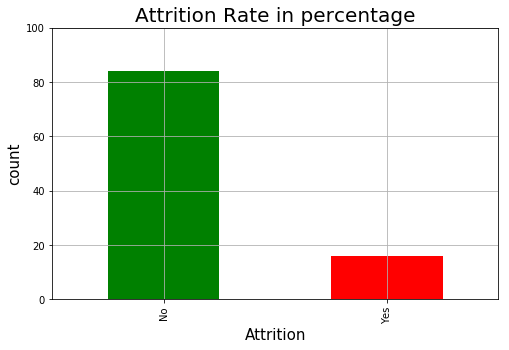

In [45]:
plt.figure()
((hr_data.Attrition.value_counts()/sum(hr_data.Attrition.value_counts()))*100).plot(kind='bar',figsize=(8,5),color=["green","red"],fontsize=10)
plt.ylim([0,100])
plt.title("Attrition Rate in percentage",fontsize=20)
plt.xlabel('Attrition',fontsize=15)
plt.ylabel("count",fontsize=15)
plt.grid()
plt.show()

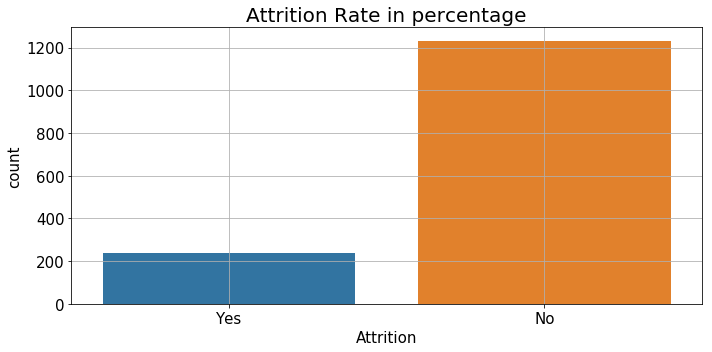

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='Attrition',data=hr_data)
#or
#temp=pd.DataFrame(data.Attrition.value_counts())
#sns.barplot(temp.index,temp.Attrition,data=hr_data)
plt.title("Attrition Rate in percentage",fontsize=20)
plt.xlabel('Attrition',fontsize=15)
plt.xticks(rotation=0,fontsize=15)
plt.ylabel("count",fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.tight_layout()

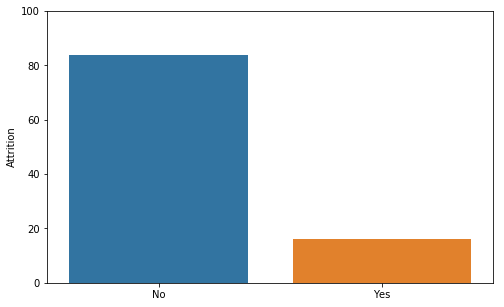

In [57]:
plt.figure(figsize=(8,5))
temp=pd.DataFrame((hr_data.Attrition.value_counts()/sum(hr_data.Attrition.value_counts()))*100)
sns.barplot(temp.index,temp.Attrition,data=hr_data)
plt.ylim([0,100])
plt.show()

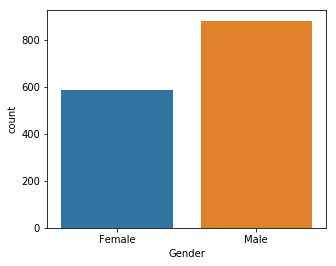

In [54]:
plt.figure(figsize=(5,4))
sns.countplot(x= hr_data.Gender)
plt.show()

In [58]:
hr_data.groupby('Attrition').count()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


In [59]:
hr_data.groupby('Attrition').size()

Attrition
No     1233
Yes     237
dtype: int64

In [92]:
Gender_Attrition=hr_data.groupby(['Attrition','Gender']).size()
Gender_Attrition

Attrition  Gender
No         Female    501
           Male      732
Yes        Female     87
           Male      150
dtype: int64

In [87]:
aggregations={'Age':['min','max']}
a = hr_data.groupby('Attrition').agg(aggregations)
a

Age    
          min max
Attrition        
No         18  60
Yes        18  58

In [68]:
a.Age['min']

Attrition
No     18
Yes    18
Name: min, dtype: int64

In [85]:
a.columns.ravel()

array(['Age_min', 'Age_max'], dtype=object)

In [88]:
a.columns=["_".join(x) for x in a.columns.ravel()]
a

,Age_min,Age_max
Attrition,,
No,18,60
Yes,18,58


In [89]:
aggregationsS={'MonthlyIncome':['min','max']}
s = hr_data.groupby('Attrition',as_index=False).agg(aggregationsS)
s.columns = ["_".join(x) for x in s.columns.ravel()]
s


,Attrition_,MonthlyIncome_min,MonthlyIncome_max
0,No,1051,19999
1,Yes,1009,19859


In [90]:
aggregationsS={'MonthlyIncome':['min','max'],"Age":['min','max']}
s = hr_data.groupby('Attrition',).agg(aggregationsS)
s.columns = ["_".join(x) for x in s.columns.ravel()]
s


,MonthlyIncome_min,MonthlyIncome_max,Age_min,Age_max
Attrition,,,,
No,1051,19999,18,60
Yes,1009,19859,18,58


In [96]:
Gender_Attrition = Gender_Attrition.unstack()

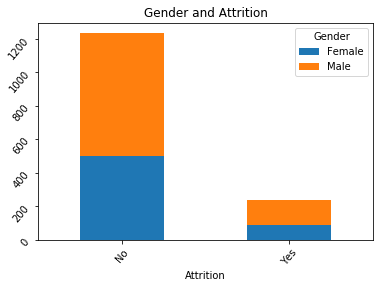

In [108]:
Gender_Attrition.plot(kind='bar')
plt.title('Gender and Attrition')
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()

In [95]:
Gender_Attrition.plot(kind='stack')
plt.title('Gender and Attrition')
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()

ValueError: 'stack' is not a valid plot kind

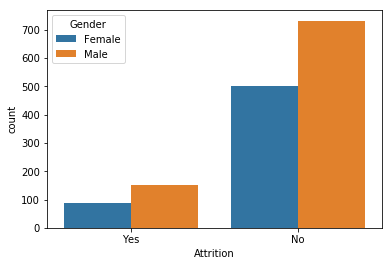

In [99]:
sns.countplot('Attrition',hue='Gender',data=hr_data)

In [101]:
hr_data['Age_Bins'] = np.digitize(hr_data.Age,[0,25,50],right=True)

In [103]:
distance_gender = hr_data.groupby(['Age_Bins','Gender']).size().unstack()
distance_gender

Gender,Female,Male
Age_Bins,,
1,43,80
2,481,723
3,64,79


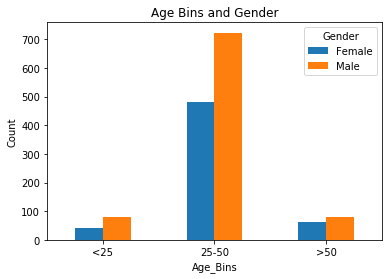

In [104]:
distance_gender.plot(kind= 'bar',stacked=False)
plt.title('Age Bins and Gender')
plt.xticks([0,1,2],["<25","25-50",">50"],rotation = 0)

plt.ylabel('Count')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

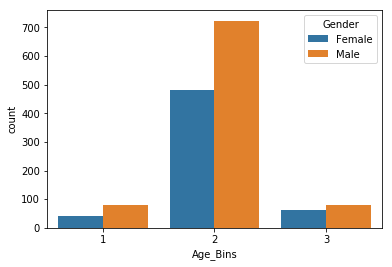

In [107]:
sns.countplot('Age_Bins',hue='Gender',data=hr_data)


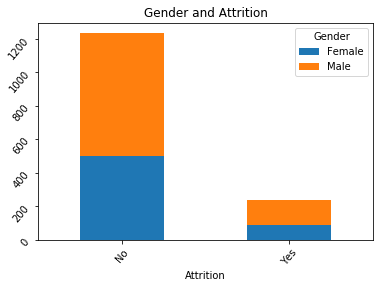

In [109]:
Gender_Attrition.plot(kind='bar',stacked=True)
plt.title('Gender and Attrition')
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()

In [118]:
ct

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


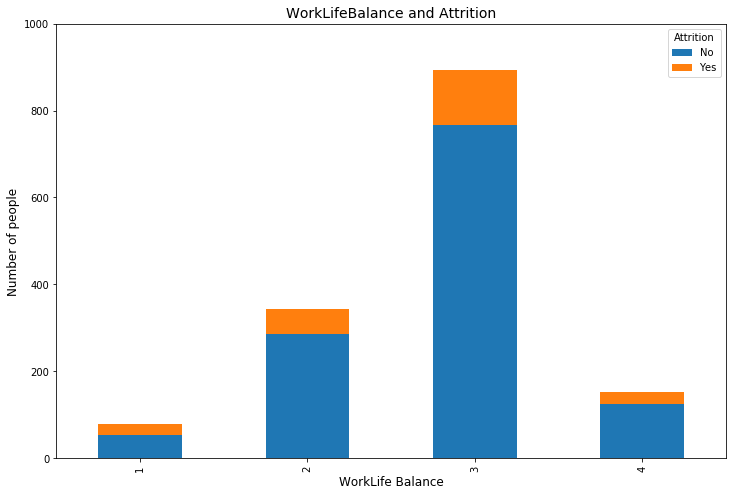

In [114]:
ct = pd.crosstab(hr_data.WorkLifeBalance, hr_data.Attrition)

ct.plot(kind='bar',stacked=True,figsize = (12,8))

plt.title('WorkLifeBalance and Attrition',fontsize = 14)
plt.xlabel('WorkLife Balance',fontsize = 12)
plt.ylabel('Number of people',fontsize = 12)

plt.legend(title='Attrition')
plt.ylim(0,1000)
plt.show()

In [116]:
hr_data['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64